In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
df_station = pd.read_csv('201508_station_data.csv')
df_station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [5]:
df_station.shape

(70, 7)

In [6]:
#df_station = df_station.set_index('dockcount').sort_index()
#df_station.sort_index(ascending =False).head() #(1,ascending =False)

In [5]:
df_status = pd.read_csv('201508_status_data.csv')
df_status.head()

,station_id,bikes_available,docks_available,time
0,2,15,12,2014-09-01 00:00:03
1,2,15,12,2014-09-01 00:01:02
2,2,15,12,2014-09-01 00:02:02
3,2,15,12,2014-09-01 00:03:03
4,2,15,12,2014-09-01 00:04:02


In [8]:
df_status.shape

(36647622, 4)

In [6]:
df_trip = pd.read_csv('201508_trip_data.csv')
df_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [10]:
df_trip.shape

(354152, 11)

In [7]:
df_weather = pd.read_csv('201508_weather_data.csv')
df_weather.head()

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,9/1/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0,0.0,NaN,290.0,94107
1,9/2/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0,5.0,NaN,290.0,94107
2,9/3/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0,4.0,NaN,276.0,94107
3,9/4/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0,5.0,NaN,301.0,94107
4,9/5/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0,4.0,NaN,309.0,94107


In [12]:
df_weather.shape

(1825, 24)

In [8]:
df_station.landmark.value_counts()

San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
Name: landmark, dtype: int64

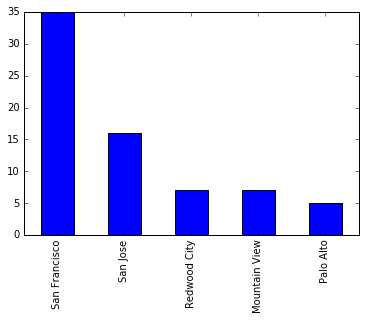

In [9]:
df_station.landmark.value_counts().plot(kind='bar')

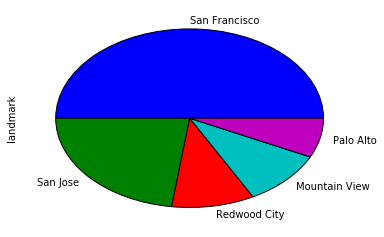

In [10]:
df_station.landmark.value_counts().plot(kind='pie')

In [11]:
df2 = df_station.groupby('landmark').size()
df2.sort_values(ascending=False)

landmark
San Francisco    35
San Jose         16
Redwood City      7
Mountain View     7
Palo Alto         5
dtype: int64

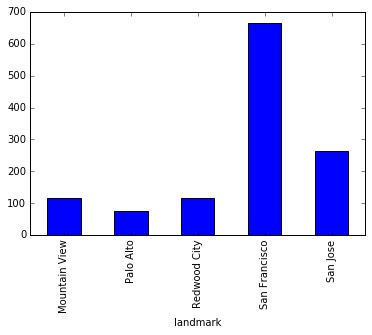

In [12]:
df_station.groupby('landmark').sum().dockcount.plot(kind='bar')

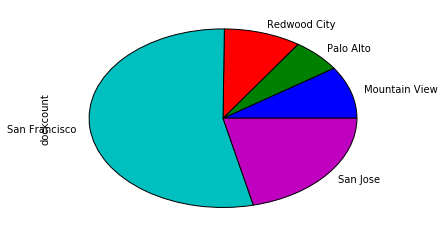

In [13]:
df_station.groupby('landmark').sum().dockcount.plot(kind='pie')

In [14]:
df_trip.groupby('Start Station').sum().head()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
Start Station,,,,,
2nd at Folsom,5383062872,4346624,495938,501335,3509802
2nd at South Park,6264113955,6550724,606016,607608,4168685
2nd at Townsend,9493286606,10085491,855586,852574,6168957
5th at Howard,5189938745,6629794,439356,491317,3376924
Adobe on Almaden,381093606,930748,2810,3697,145357


In [15]:
#df_station
df2_station = df_station[:]
#df2_station
df2_station = df2_station.rename(columns={'name':'Start Station'})
#df2_station
df2_trip = pd.merge(df_trip, df2_station)
df2_trip.groupby('landmark').sum().dockcount.sort_values(ascending=False)

landmark
San Francisco    6214892
San Jose          332256
Mountain View     182169
Palo Alto          50299
Redwood City       39235
Name: dockcount, dtype: int64

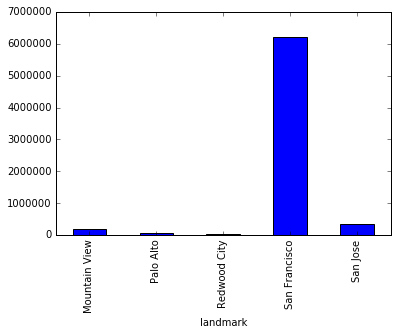

In [16]:
df2_trip.groupby('landmark').sum().dockcount.plot(kind='bar')

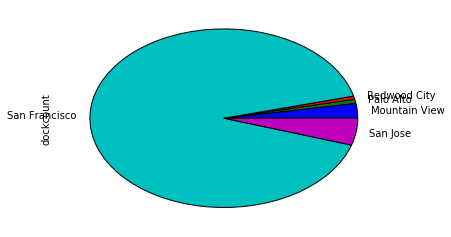

In [17]:
df2_trip.groupby('landmark').sum().dockcount.plot(kind='pie')

In [70]:
from datetime import datetime

In [36]:
df_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [37]:
df_trip.groupby('Start Date').size().head()

Start Date
1/1/2015 0:25    1
1/1/2015 0:28    1
1/1/2015 0:30    1
1/1/2015 0:31    1
1/1/2015 0:32    1
dtype: int64

In [58]:
date2 = df_trip['Start Date']
date2.head()

0    8/31/2015 23:26
1    8/31/2015 23:11
2    8/31/2015 23:13
3    8/31/2015 23:10
4    8/31/2015 23:09
Name: Start Date, dtype: object

In [39]:
#df_trip.resample("D")
#df_trip.groupby(pd.TimeGrouper("M"))#.size().head()

In [60]:
df_trip_new =df_trip.head()
df_trip_new

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [41]:
df_trip_new['month'] = pd.DatetimeIndex(df_trip_new['Start Date']).month

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
df_trip_new.dtypes

Trip ID             int64
Duration            int64
Start Date         object
Start Station      object
Start Terminal      int64
End Date           object
End Station        object
End Terminal        int64
Bike #              int64
Subscriber Type    object
Zip Code           object
dtype: object

In [67]:
date2 = df_trip_new['Start Date']
date2.head()

0    8/31/2015 23:26
1    8/31/2015 23:11
2    8/31/2015 23:13
3    8/31/2015 23:10
4    8/31/2015 23:09
Name: Start Date, dtype: object

In [66]:
df_trip_new.loc[:,'Start Date'] = df_trip_new.loc[:,'Start Date'].astype(dt)

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [101]:
#date_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
#date_object = datetime.strptime('8/31/2015 23:26', '%m/%d/%Y %H:%M')
date_object = datetime.strptime(date2[3], '%m/%d/%Y %H:%M')

In [102]:
date_object.month

8

In [71]:
type(df_trip['Start Date'])

pandas.core.series.Series

In [49]:
df_trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [62]:
df_trip.dtypes

Trip ID             int64
Duration            int64
Start Date         object
Start Station      object
Start Terminal      int64
End Date           object
End Station        object
End Terminal        int64
Bike #              int64
Subscriber Type    object
Zip Code           object
dtype: object

In [103]:
df3 = pd.to_datetime(df_trip_new['Start Date'], format='%m/%d/%Y %H:%M')

In [105]:
df3

0   2015-08-31 23:26:00
1   2015-08-31 23:11:00
2   2015-08-31 23:13:00
3   2015-08-31 23:10:00
4   2015-08-31 23:09:00
Name: Start Date, dtype: datetime64[ns]

In [110]:
#df_trip_new.head()
df_trip_new['Date'] = df3 

/Users/aungshumaan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [111]:
df_trip_new.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Date
0,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,2015-08-31 23:26:00
1,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,2015-08-31 23:11:00
2,913455,307,2015-08-31 23:13:00,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,2015-08-31 23:13:00
3,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,2015-08-31 23:10:00
4,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069,2015-08-31 23:09:00


In [122]:
df_trip_new.index = df_trip_new['Date']
df_trip_new

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Date
Date,,,,,,,,,,,,
2015-08-31 23:26:00,913460,765,2015-08-31 23:26:00,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,2015-08-31 23:26:00
2015-08-31 23:11:00,913459,1036,2015-08-31 23:11:00,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,2015-08-31 23:11:00
2015-08-31 23:13:00,913455,307,2015-08-31 23:13:00,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,2015-08-31 23:13:00
2015-08-31 23:10:00,913454,409,2015-08-31 23:10:00,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,2015-08-31 23:10:00
2015-08-31 23:09:00,913453,789,2015-08-31 23:09:00,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069,2015-08-31 23:09:00


In [125]:
pd.groupby(df_trip_new,by=[df_trip_new.index.day,df_trip_new.index.month,df_trip_new.index.year]).sum()

,,,Trip ID,Duration,Start Terminal,End Terminal,Bike #
31,8,2015,4567281,3306,189,229,1346


In [126]:
df_trip['Date']  = pd.to_datetime(df_trip['Start Date'], format='%m/%d/%Y %H:%M')

In [128]:
df_trip.index = df_trip['Date']

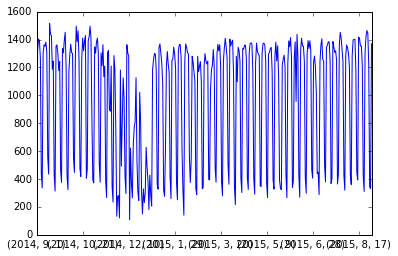

In [133]:
pd.groupby(df_trip,by=[df_trip.index.year,df_trip.index.month,df_trip.index.day]).size().plot()
#pd.groupby(df_trip,by=[df_trip['Date'].day,df_trip['Date'].index.month,df_trip['Date'].index.year]).sum()